In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [55]:
data = pd.read_excel('/content/Assignment_Dataset.xlsx')
data.head()

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [ ]:
data.shape

(982, 3)

In [22]:
data[data['PR'] == min(data['PR'])]

,Date,GHI,PR,PRGHI,MovingAvgPR,Budget,Color
417,2020-08-21,5.852967,60.023886,65.876853,77.932683,73.1,orange


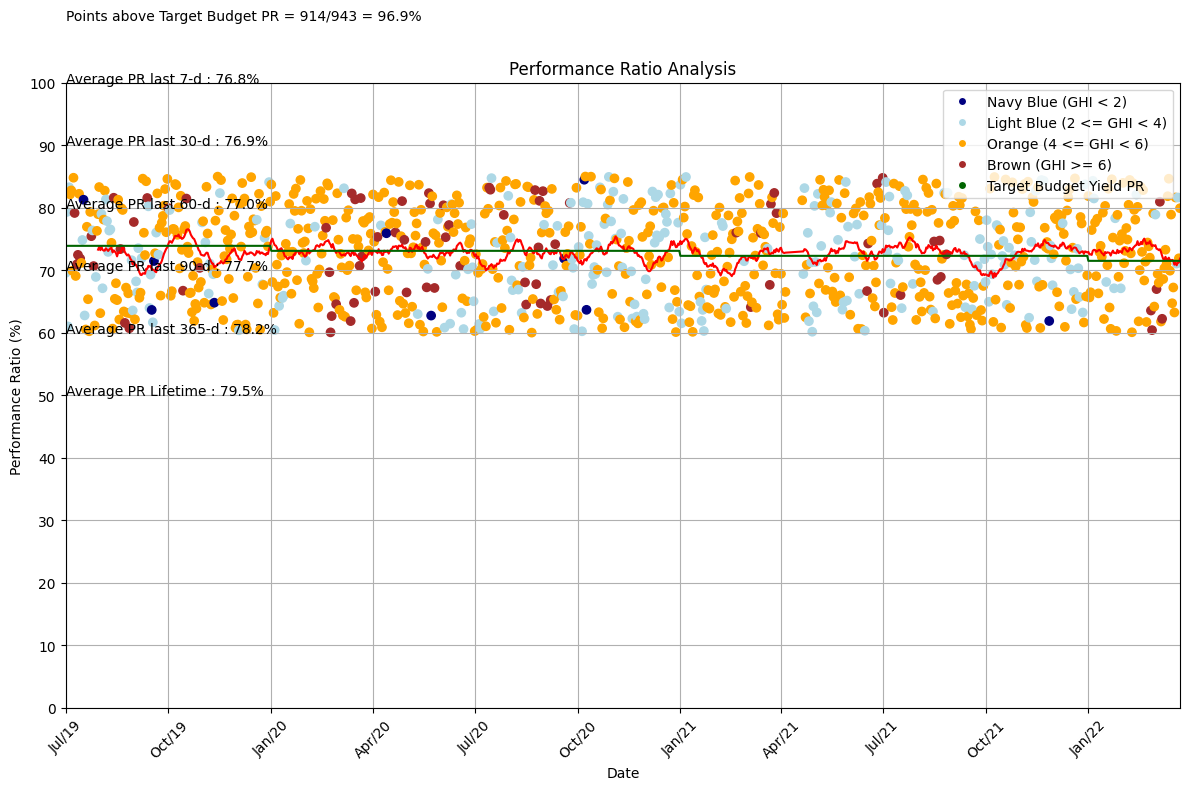

In [44]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the moving average of PR (30-day)
data['PRGHI'] = data['GHI'] + data['PR']
data['MovingAvgPR'] = data['PR'].rolling(window=30).mean()

# Calculate budget line values
start_year = data['Date'].min().year
budget_values = [73.9 - (year - start_year) * 0.8 for year in data['Date'].dt.year]
data['Budget'] = budget_values

# Define colors based on GHI values
def get_color(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

data['Color'] = data['GHI'].apply(get_color)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['MovingAvgPR'], color='red', label='30-d Moving Avg of PR')
plt.scatter(data['Date'], data['PR'], c=data['Color'], label='PR')
plt.plot(data['Date'], data['Budget'], color='darkgreen', label='Budget Line')

plt.xlabel('Date')
plt.ylabel('Performance Ratio (%)')
plt.title('Performance Ratio Analysis')
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))  # Set y-axis ticks at intervals of 10
plt.legend()

# Custom x-axis ticks and range
month_year_fmt = mdates.DateFormatter('%b/%y')
plt.gca().xaxis.set_major_formatter(month_year_fmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xlim(data['Date'].min(), data['Date'].max())  # Set x-axis range from min to max date

# Create legend for color coding
legend_labels = ['Navy Blue (GHI < 2)', 'Light Blue (2 <= GHI < 4)', 'Orange (4 <= GHI < 6)', 'Brown (GHI >= 6)', 'Target Budget Yield PR']
legend_colors = ['navy', 'lightblue', 'orange', 'brown', 'darkgreen']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)], loc='upper right')

# Additional details
plt.text(data['Date'].min(), 110, 'Points above Target Budget PR = 914/943 = 96.9%', fontsize=10)
plt.text(data['Date'].min(), 100, 'Average PR last 7-d : 76.8%', fontsize=10)
plt.text(data['Date'].min(), 90, 'Average PR last 30-d : 76.9%', fontsize=10)
plt.text(data['Date'].min(), 80, 'Average PR last 60-d : 77.0%', fontsize=10)
plt.text(data['Date'].min(), 70, 'Average PR last 90-d : 77.7%', fontsize=10)
plt.text(data['Date'].min(), 60, 'Average PR last 365-d : 78.2%', fontsize=10)
plt.text(data['Date'].min(), 50, 'Average PR Lifetime : 79.5%', fontsize=10)

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


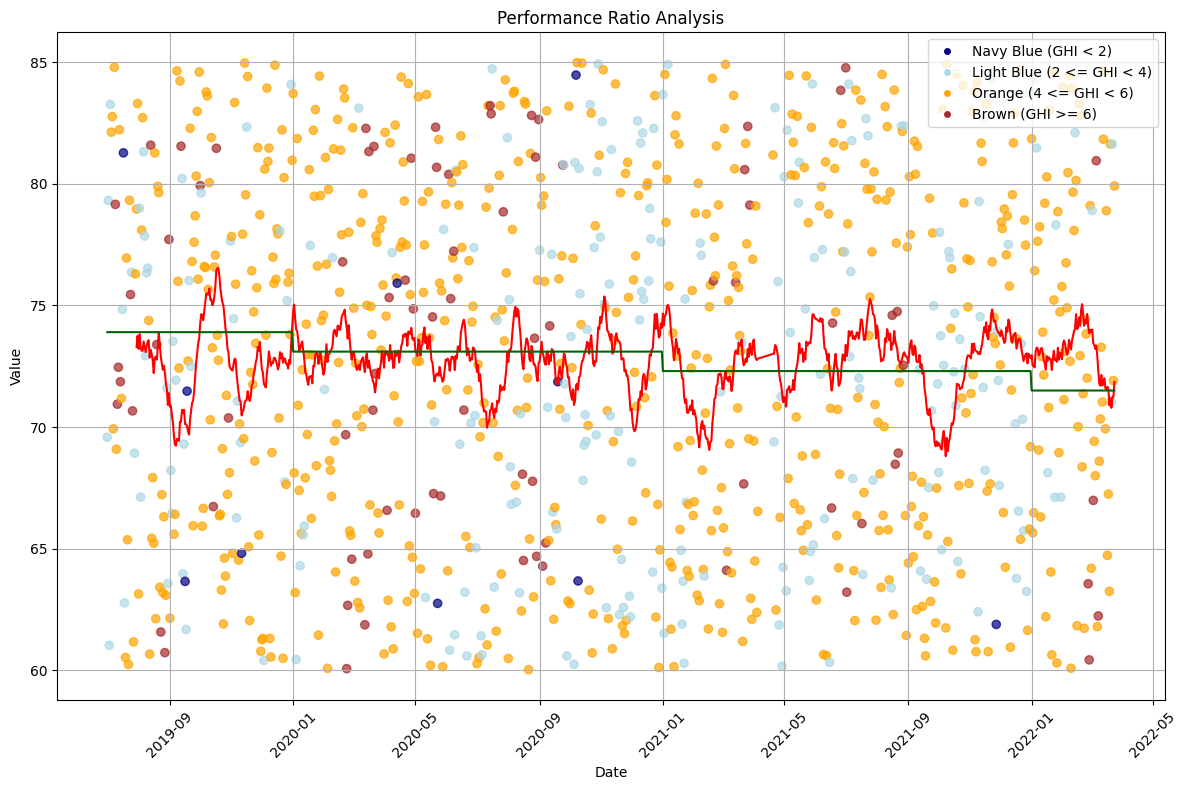

In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the moving average of PR (30-day)
data['MovingAvgPR'] = data['PR'].rolling(window=30).mean()

# Calculate budget line values
start_year = data['Date'].min().year
budget_values = [73.9 - (year - start_year) * 0.8 for year in data['Date'].dt.year]
data['Budget'] = budget_values

# Define colors based on GHI values
def get_color(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

data['Color'] = data['GHI'].apply(get_color)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['MovingAvgPR'], color='red', label='30-d Moving Avg of PR')
plt.scatter(data['Date'], data['PR'], c=data['Color'], label='PR', alpha=0.7)
plt.plot(data['Date'], data['Budget'], color='darkgreen', label='Budget Line')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Performance Ratio Analysis')
plt.legend()

# Create legend for color coding
legend_labels = ['Navy Blue (GHI < 2)', 'Light Blue (2 <= GHI < 4)', 'Orange (4 <= GHI < 6)', 'Brown (GHI >= 6)']
legend_colors = ['navy', 'lightblue', 'orange', 'brown']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)], loc='upper right')

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the moving average of PR (30-day)
data['MovingAvgPR'] = data['PR'].rolling(window=30).mean()

# Calculate budget line values
start_year = data['Date'].min().year
budget_values = [73.9 - (year - start_year) * 0.8 for year in data['Date'].dt.year]
data['Budget'] = budget_values

# Define colors based on GHI values
def get_color(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

data['Color'] = data['GHI'].apply(get_color)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['MovingAvgPR'], color='red', label='30-d Moving Avg of PR')
plt.scatter(data['Date'], data['PR'], c=data['Color'], label='PR', alpha=0.7)
plt.plot(data['Date'], data['Budget'], color='darkgreen', label='Budget Line')

plt.xlabel('Date')
plt.ylabel('Performance Ratio (%)')
plt.title('Performance Ratio Analysis')
plt.ylim(0, 100)
plt.legend()

# Custom x-axis ticks
plt.xticks(range(0, len(data), 20), data['Date'].dt.strftime('%b/%y')[::20])
month_year_fmt = mdates.DateFormatter('%b/%y')
plt.gca().xaxis.set_major_formatter(month_year_fmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Create legend for color coding
legend_labels = ['Navy Blue (GHI < 2)', 'Light Blue (2 <= GHI < 4)', 'Orange (4 <= GHI < 6)', 'Brown (GHI >= 6)', 'Target Budget Yield PR']
legend_colors = ['navy', 'lightblue', 'orange', 'brown', 'darkgreen']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)], loc='upper right')

# Additional details
plt.text(data['Date'].min(), 110, 'Points above Target Budget PR = 914/943 = 96.9%', fontsize=10)
plt.text(data['Date'].min(), 100, 'Average PR last 7-d : 76.8%', fontsize=10)
plt.text(data['Date'].min(), 90, 'Average PR last 30-d : 76.9%', fontsize=10)
plt.text(data['Date'].min(), 80, 'Average PR last 60-d : 77.0%', fontsize=10)
plt.text(data['Date'].min(), 70, 'Average PR last 90-d : 77.7%', fontsize=10)
plt.text(data['Date'].min(), 60, 'Average PR last 365-d : 78.2%', fontsize=10)
plt.text(data['Date'].min(), 50, 'Average PR Lifetime : 79.5%', fontsize=10)

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
